# Team Project 1
## DS160-01
### AUTHORS: Naat Ambrosino and Jardin Dantzler
### VERSION: 1
### SEMESTER: Spring 2022
### SUMMARY:
#### We developed this notebook to....

#### Pre-work (cleaning up dataset in general)

In [609]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import pylab 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [610]:
df=pd.read_csv('Canada_Hosp1_COVID_Data_At_Admission.csv')
dfx=pd.read_csv('Canada_Hosp1_COVID_Data_At_Admission.csv')


In [611]:
df

,id,reason_for_admission,age,sex,ethnicity,ethnicity_other,height,weight,comorbidities,comorbidities_other,...,pao2,pao2_fio2,ph,high_senstivity_cardiac_troponin,esr,inr,ferritin,d_dimer,crp,hs_crp
0,1,Fever [R50.9],74,Male,"""[]""",NaN,NaN,NaN,"""[\""Hypertension\"",\""Diabetes\"",\""Other\""]""","GERD (gastroesophageal reflux disease), Dement...",...,NaN,NaN,NaN,NaN,NaN,1.1,NaN,NaN,223.0,NaN
1,2,Pneumonia [J18.9],61,Female,"""[]""",NaN,154.9,73.6,"""[\""Hypertension\"",\""Other\""]""","Closed fracture of fifth metatarsal bone, Dive...",...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2354,95.6,NaN
2,3,Pneumonia [J18.9],58,Female,"""[]""",NaN,NaN,NaN,"""[\""Hypertension\""]""",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Suspected COVID-19 virus infection [U07.2],94,Male,"""[]""",NaN,182.8,66.2,"""[\""Hypertension\"",\""Other\""]""","Parkinson's Disease, Back pain, Benign Prostat...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,"Febrile respiratory illness [J98.9, R50.9]",91,Male,"""[]""",NaN,NaN,NaN,"""[\""Chronic cardiac disease (not hypertension)...","TAVI, Atrial fibrillation, Gastric Reflux, Pac...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,516,Shortness of breath [R06.0],74,Female,"""[]""",NaN,NaN,55.0,"""[\""Other\""]""","Arthritis, High cholesterol, Hypothyroidism, V...",...,NaN,NaN,NaN,NaN,NaN,1.1,NaN,NaN,NaN,NaN
504,517,COVID-19 [U07.1],81,Male,"""[]""",NaN,158.0,65.0,"""[\""Hypertension\"",\""Chronic renal\"",\""Diabete...","GERD (gastroesophageal reflux disease), High c...",...,76.0,1.5,7.44,NaN,NaN,NaN,NaN,>4000,NaN,NaN
505,519,COVID-19 [U07.1],74,Male,"""[]""",NaN,NaN,81.7,"""[\""Hypertension\"",\""Other\""]""","Dermatitis, Hyponatremia, Irritable bowel synd...",...,NaN,NaN,NaN,NaN,NaN,1.5,NaN,NaN,NaN,NaN
506,521,COVID-19 [U07.1],48,Female,"""[]""",NaN,180.0,95.3,"""[]""",NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,428,NaN,NaN


In [612]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                508 non-null    int64  
 1   reason_for_admission              508 non-null    object 
 2   age                               508 non-null    int64  
 3   sex                               508 non-null    object 
 4   ethnicity                         508 non-null    object 
 5   ethnicity_other                   0 non-null      float64
 6   height                            272 non-null    float64
 7   weight                            358 non-null    float64
 8   comorbidities                     508 non-null    object 
 9   comorbidities_other               404 non-null    object 
 10  received_covid_vaccine            1 non-null      object 
 11  covid_vaccine                     0 non-null      float64
 12  medicati

Dropping ID as it is just a alternative index (and skips values, its intended to be used to reference a single patient across the different datasets but since we are only using the Data At Admission dataset, the ID column is obsolete), along with the columns that are empty or nearly empty (<=40 non-null values.) We will decide on other columns with much missing data later.

In [613]:
df.columns

Index(['id', 'reason_for_admission', 'age', 'sex', 'ethnicity',
       'ethnicity_other', 'height', 'weight', 'comorbidities',
       'comorbidities_other', 'received_covid_vaccine', 'covid_vaccine',
       'medications', 'smoking_history', 'year_they_quit',
       'previous_er_visit_within_14_days', 'admission_disposition',
       'systolic_blood_pressure', 'diastolic_blood_pressure', 'heart_rate',
       'respiratory_rate', 'oxygen_saturation', 'temperature', 'motor',
       'verbal', 'eye', 'intubated', 'wbc', 'rbc', 'hemoglobin', 'hematocrit',
       'mcv', 'mch', 'mchc', 'rdw', 'platelet_count', 'aptt_aptr', 'pt', 'alt',
       'ast', 'serum_creatinine', 'sodium', 'potassium',
       'total_serum_bilirubin', 'lactate', 'pao2', 'pao2_fio2', 'ph',
       'high_senstivity_cardiac_troponin', 'esr', 'inr', 'ferritin', 'd_dimer',
       'crp', 'hs_crp'],
      dtype='object')

In [614]:
df.drop(['id','ethnicity_other','received_covid_vaccine', 'covid_vaccine',
        'pao2', 'pao2_fio2', 'ph',
       'high_senstivity_cardiac_troponin', 'esr','ferritin','hs_crp'],
       axis=1, inplace=True)

In [615]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   reason_for_admission              508 non-null    object 
 1   age                               508 non-null    int64  
 2   sex                               508 non-null    object 
 3   ethnicity                         508 non-null    object 
 4   height                            272 non-null    float64
 5   weight                            358 non-null    float64
 6   comorbidities                     508 non-null    object 
 7   comorbidities_other               404 non-null    object 
 8   medications                       508 non-null    object 
 9   smoking_history                   296 non-null    object 
 10  year_they_quit                    43 non-null     float64
 11  previous_er_visit_within_14_days  508 non-null    object 
 12  admissio

Noticed earlier that ethnicity seems to have a lot of (if not completely comprised of) "[]" values, and on the website there seemed to be an off value in the sex column. Going to check both of them using .groupby().count to see if we should keep ethnicity at all and whether theres a typo in sex.

In [616]:
df.ethnicity.groupby(df.ethnicity).count()

ethnicity
"[]"    508
Name: ethnicity, dtype: int64

Ethnicity column has no actual values for all intents and purposes. Dropping.

In [617]:
df.drop(['ethnicity'],axis=1,inplace=True)

In [618]:
df.sex.groupby(df.sex).count()

sex
Female    212
Male      296
Name: sex, dtype: int64

Does not appear to be a typo in sex. Good! Now checking how many columns we still have, along with their datatypes.

In [619]:
len(df.columns)

43

In [620]:
df.head()

,reason_for_admission,age,sex,height,weight,comorbidities,comorbidities_other,medications,smoking_history,year_they_quit,...,alt,ast,serum_creatinine,sodium,potassium,total_serum_bilirubin,lactate,inr,d_dimer,crp
0,Fever [R50.9],74,Male,NaN,NaN,"""[\""Hypertension\"",\""Diabetes\"",\""Other\""]""","GERD (gastroesophageal reflux disease), Dement...","""[{\""medications\"":\""TYLENOL EXTRA STRENGTH\"",...",NaN,NaN,...,53.0,49.0,165.0,135.0,3.9,10.0,2.3,1.1,NaN,223.0
1,Pneumonia [J18.9],61,Female,154.9,73.6,"""[\""Hypertension\"",\""Other\""]""","Closed fracture of fifth metatarsal bone, Dive...","""[{\""medications\"":\""CANDESARTAN\"",\""dosage\"":...",NaN,NaN,...,68.0,68.0,49.0,137.0,3.8,12.0,1.5,1.0,2354,95.6
2,Pneumonia [J18.9],58,Female,NaN,NaN,"""[\""Hypertension\""]""",NaN,"""[{\""medications\"":\""\"",\""dosage\"":\""\"",\""freq...",NaN,NaN,...,52.0,76.0,71.0,135.0,3.7,7.0,1.0,NaN,NaN,NaN
3,Suspected COVID-19 virus infection [U07.2],94,Male,182.8,66.2,"""[\""Hypertension\"",\""Other\""]""","Parkinson's Disease, Back pain, Benign Prostat...","""[{\""medications\"":\""ACETYLSALICYLIC ACID TAB...",NaN,NaN,...,6.0,24.0,146.0,135.0,2.8,10.0,4.5,NaN,NaN,NaN
4,"Febrile respiratory illness [J98.9, R50.9]",91,Male,NaN,NaN,"""[\""Chronic cardiac disease (not hypertension)...","TAVI, Atrial fibrillation, Gastric Reflux, Pac...","""[{\""medications\"":\""TRAZODONE\"",\""dosage\"":\""...",Ex-smoker,NaN,...,17.0,26.0,109.0,142.0,3.8,19.0,3.2,NaN,NaN,NaN


In [621]:
df.dtypes

reason_for_admission                 object
age                                   int64
sex                                  object
height                              float64
weight                              float64
comorbidities                        object
comorbidities_other                  object
medications                          object
smoking_history                      object
year_they_quit                      float64
previous_er_visit_within_14_days     object
admission_disposition                object
systolic_blood_pressure               int64
diastolic_blood_pressure              int64
heart_rate                            int64
respiratory_rate                      int64
oxygen_saturation                     int64
temperature                         float64
motor                               float64
verbal                              float64
eye                                 float64
intubated                            object
wbc                             

Going to get the pairwise correlation table just to see if theres anything that immmediately stands out at this stage.

In [622]:
df.corr()

,age,height,weight,year_they_quit,systolic_blood_pressure,diastolic_blood_pressure,heart_rate,respiratory_rate,oxygen_saturation,temperature,...,pt,alt,ast,serum_creatinine,sodium,potassium,total_serum_bilirubin,lactate,inr,crp
age,1.000000,-0.270279,-0.377498,-0.343756,0.069945,-0.171599,-0.347154,-0.145326,-0.030766,-0.024273,...,0.121951,-0.163725,-0.011269,0.158276,0.168237,0.186950,0.134210,0.124115,0.105539,-0.096656
height,-0.270279,1.000000,0.467210,-0.022039,0.024319,0.099043,0.141969,0.011598,0.007100,0.051773,...,0.199803,0.121294,0.101476,0.040418,-0.001297,0.140092,0.203312,0.123085,0.200931,0.103205
weight,-0.377498,0.467210,1.000000,-0.100169,-0.006880,0.079176,0.098641,0.078056,-0.087124,0.054604,...,0.028663,-0.001842,-0.028792,-0.010503,-0.059378,-0.002744,0.051082,0.042740,0.022127,0.271309
year_they_quit,-0.343756,-0.022039,-0.100169,1.000000,0.075185,0.242800,0.172657,0.157459,-0.377551,0.002955,...,-0.176305,-0.011995,0.051852,-0.046996,-0.148895,0.015586,0.104789,0.223867,-0.173659,-0.491629
systolic_blood_pressure,0.069945,0.024319,-0.006880,0.075185,1.000000,0.567449,0.126706,0.113850,0.019313,0.087001,...,-0.019106,-0.004266,0.002675,0.022953,-0.108161,0.034805,0.011347,0.041900,-0.012608,-0.005780
diastolic_blood_pressure,-0.171599,0.099043,0.079176,0.242800,0.567449,1.000000,0.288724,0.121301,0.100811,0.005300,...,-0.026929,0.043448,-0.006840,-0.044403,-0.013462,0.039455,0.025469,0.051104,-0.019948,-0.160041
heart_rate,-0.347154,0.141969,0.098641,0.172657,0.126706,0.288724,1.000000,0.281794,-0.110209,0.205067,...,-0.054262,0.104361,0.020194,-0.107036,-0.005217,-0.109494,-0.009321,0.151708,-0.051685,0.061270
respiratory_rate,-0.145326,0.011598,0.078056,0.157459,0.113850,0.121301,0.281794,1.000000,-0.292778,0.123891,...,0.004878,0.102044,0.065757,-0.046695,-0.018047,-0.065051,0.128252,0.244511,0.005740,0.398590
oxygen_saturation,-0.030766,0.007100,-0.087124,-0.377551,0.019313,0.100811,-0.110209,-0.292778,1.000000,0.032976,...,-0.057442,-0.014962,-0.075452,0.044824,0.074685,0.072773,-0.110496,-0.312522,-0.043497,-0.293848
temperature,-0.024273,0.051773,0.054604,0.002955,0.087001,0.005300,0.205067,0.123891,0.032976,1.000000,...,-0.074575,-0.013911,-0.052316,0.035265,-0.054681,-0.110988,-0.076264,-0.164282,-0.082416,-0.093513


Well, it seems like most things are very weakly correlated, but there is a correlation coefficient of .996 between inr and pt.  Theres a .8 between alt and ast.  Those might be worth looking into. Surprisingly it seems like age does not have a correlation with an absolute value more than .5, which is noteable and might be worth looking at via pair plots.

In [623]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 43 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   reason_for_admission              508 non-null    object 
 1   age                               508 non-null    int64  
 2   sex                               508 non-null    object 
 3   height                            272 non-null    float64
 4   weight                            358 non-null    float64
 5   comorbidities                     508 non-null    object 
 6   comorbidities_other               404 non-null    object 
 7   medications                       508 non-null    object 
 8   smoking_history                   296 non-null    object 
 9   year_they_quit                    43 non-null     float64
 10  previous_er_visit_within_14_days  508 non-null    object 
 11  admission_disposition             508 non-null    object 
 12  systolic

I'm going to look through the of categorical variable columns and drop them if they don't seem useful, edit them if they're messy/hard to work with, or just leave them be. I'll also look through the continuous variables directly related to them, if any (ie, year_they_quit is directly related to smoking_history).  

In [624]:
df.reason_for_admission

0                                   Fever [R50.9]
1                               Pneumonia [J18.9]
2                               Pneumonia [J18.9]
3      Suspected COVID-19 virus infection [U07.2]
4      Febrile respiratory illness [J98.9, R50.9]
                          ...                    
503                   Shortness of breath [R06.0]
504                              COVID-19 [U07.1]
505                              COVID-19 [U07.1]
506                              COVID-19 [U07.1]
507                              COVID-19 [U07.1]
Name: reason_for_admission, Length: 508, dtype: object

In [625]:
df.reason_for_admission.groupby(df.reason_for_admission).count()

reason_for_admission
ARDS (adult respiratory distress syndrome) [J80]                        1
Acquired respiratory distress syndrome [J80]                            1
Atypical pneumonia [J18.9]                                              2
COVID-19 [U07.1]                                                      217
COVID-19 determined by clinical diagnostic criteria [U07.2]             1
COVID-19 virus infection [U07.1]                                        2
COVID-19 with multiple comorbidities [U07.1]                            1
Coronavirus infection [B34.2]                                           2
Cough [R05]                                                             2
Febrile respiratory illness [J98.9, R50.9]                              7
Fever [R50.9]                                                          21
Fever of unknown origin [R50.9]                                         1
Hypoxemia [R09.0]                                                       1
Hypoxia [R09.0]  

Reason for admission column has some values that are identical in meaning but use slightly different wording. For example, one observation has the value "Fever of unknown origin [R50.9]" and is thus counted seperately from the 21 observations with the entry "Fever [R50.9]". So, we decided to streamline the values so that if two values are represented by the same code(s) or combination of codes, they will be identical.

In [626]:
def streamReason(x):
    if '[J80]' in x:
        return 'Acute respiratory distress syndrome'
        #Note: After some research, I found Acquired rds and Adult rds both are alternate names for acute rds, so I used acute instead of acquired or adult.
    elif '[J18.9]' in x:
        return 'Pneumonia'
    elif '[U07.1]' in x:
        return 'COVID-19'
    elif '[U07.2]' in x:
        return 'Probable COVID-19'
    elif '[B34.2]' in x:
        return 'Coronavirus infection'
    elif '[R05]' in x:
        return 'Cough'
    elif '[J98.9, R50.9]' in x:
        return 'Febrile respiratory illness'
    elif '[R50.9]' in x:
        return 'Fever'
    elif '[R09.0]' in x:
        return 'Hypoxemia'
    elif '[M79.19]' in x:
        return 'Myalgia'
    elif '[U07.1, J12.8]' in x:
        return 'Pneumonia due to COVID-19 virus'
    elif '[R06.0]' in x:
        return 'Shortness of breath'
    elif '[R06.0, U07.2]' in x:
        return 'Shortness of breath with exposure to COVID-19 virus'
    elif '[R06.8]' in x:
        return 'Tachypnea'
    elif '[J12.9]' in x:
        return 'Viral pneumonia'
    elif '[J96.99]' in x:
        return 'Respiratory failure'
    elif '[J98.8]' in x:
        return 'Respiratory tract infection'
    else: 
        return x


In [627]:
#checking if the function works
streamReason('COVID-19 with multiple comorbidities [U07.1]')
#It seems to!

'COVID-19'

In [628]:
#dataframe['column to put new values in']=list(map(lambda x: functionToApply(x),dataframe['column for function to reference']))

In [629]:
df['reason_for_admission']=list(map(lambda x: streamReason(x),df['reason_for_admission']))

In [630]:
df

,reason_for_admission,age,sex,height,weight,comorbidities,comorbidities_other,medications,smoking_history,year_they_quit,...,alt,ast,serum_creatinine,sodium,potassium,total_serum_bilirubin,lactate,inr,d_dimer,crp
0,Fever,74,Male,NaN,NaN,"""[\""Hypertension\"",\""Diabetes\"",\""Other\""]""","GERD (gastroesophageal reflux disease), Dement...","""[{\""medications\"":\""TYLENOL EXTRA STRENGTH\"",...",NaN,NaN,...,53.0,49.0,165.0,135.0,3.9,10.0,2.3,1.1,NaN,223.0
1,Pneumonia,61,Female,154.9,73.6,"""[\""Hypertension\"",\""Other\""]""","Closed fracture of fifth metatarsal bone, Dive...","""[{\""medications\"":\""CANDESARTAN\"",\""dosage\"":...",NaN,NaN,...,68.0,68.0,49.0,137.0,3.8,12.0,1.5,1.0,2354,95.6
2,Pneumonia,58,Female,NaN,NaN,"""[\""Hypertension\""]""",NaN,"""[{\""medications\"":\""\"",\""dosage\"":\""\"",\""freq...",NaN,NaN,...,52.0,76.0,71.0,135.0,3.7,7.0,1.0,NaN,NaN,NaN
3,Probable COVID-19,94,Male,182.8,66.2,"""[\""Hypertension\"",\""Other\""]""","Parkinson's Disease, Back pain, Benign Prostat...","""[{\""medications\"":\""ACETYLSALICYLIC ACID TAB...",NaN,NaN,...,6.0,24.0,146.0,135.0,2.8,10.0,4.5,NaN,NaN,NaN
4,Febrile respiratory illness,91,Male,NaN,NaN,"""[\""Chronic cardiac disease (not hypertension)...","TAVI, Atrial fibrillation, Gastric Reflux, Pac...","""[{\""medications\"":\""TRAZODONE\"",\""dosage\"":\""...",Ex-smoker,NaN,...,17.0,26.0,109.0,142.0,3.8,19.0,3.2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,Shortness of breath,74,Female,NaN,55.0,"""[\""Other\""]""","Arthritis, High cholesterol, Hypothyroidism, V...","""[{\""medications\"":\""TYLENOL\"",\""dosage\"":\""32...",Non-smoker,NaN,...,30.0,41.0,72.0,131.0,4.1,10.0,2.3,1.1,NaN,NaN
504,COVID-19,81,Male,158.0,65.0,"""[\""Hypertension\"",\""Chronic renal\"",\""Diabete...","GERD (gastroesophageal reflux disease), High c...","""[{\""medications\"":\""SYNTHROID\"",\""dosage\"":\""...",NaN,NaN,...,107.0,70.0,148.0,135.0,4.2,11.0,3.7,NaN,>4000,NaN
505,COVID-19,74,Male,NaN,81.7,"""[\""Hypertension\"",\""Other\""]""","Dermatitis, Hyponatremia, Irritable bowel synd...","""[{\""medications\"":\""XANAX\"",\""dosage\"":\""1\"",...",Non-smoker,NaN,...,16.0,54.0,77.0,134.0,3.8,9.0,NaN,1.5,NaN,NaN
506,COVID-19,48,Female,180.0,95.3,"""[]""",NaN,"""[]""",NaN,NaN,...,18.0,33.0,78.0,133.0,3.9,11.0,1.4,1.0,428,NaN


In [631]:
df.reason_for_admission.groupby(df.reason_for_admission).count()

reason_for_admission
Acute respiratory distress syndrome                      2
COVID-19                                               220
Coronavirus infection                                    2
Cough                                                    2
Febrile respiratory illness                              7
Fever                                                   22
Hypoxemia                                               22
Myalgia                                                  1
Pneumonia                                              136
Pneumonia due to COVID-19 virus                         41
Probable COVID-19                                        8
Respiratory failure                                      7
Respiratory tract infection                              1
Shortness of breath                                     34
Shortness of breath with exposure to COVID-19 virus      1
Tachypnea                                                1
Viral pneumonia                    

In [632]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 43 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   reason_for_admission              508 non-null    object 
 1   age                               508 non-null    int64  
 2   sex                               508 non-null    object 
 3   height                            272 non-null    float64
 4   weight                            358 non-null    float64
 5   comorbidities                     508 non-null    object 
 6   comorbidities_other               404 non-null    object 
 7   medications                       508 non-null    object 
 8   smoking_history                   296 non-null    object 
 9   year_they_quit                    43 non-null     float64
 10  previous_er_visit_within_14_days  508 non-null    object 
 11  admission_disposition             508 non-null    object 
 12  systolic

In [633]:
df.sex.describe()

count      508
unique       2
top       Male
freq       296
Name: sex, dtype: object

In [634]:
df.sex.groupby(df.sex).count()

sex
Female    212
Male      296
Name: sex, dtype: int64

In [635]:
df.comorbidities.groupby(df.comorbidities).count()

comorbidities
"[\"Asthma\",\"Diabetes\",\"Other\"]"                              1
"[\"Asthma\",\"Obesity\",\"Other\"]"                               1
"[\"Asthma\",\"Other\"]"                                          11
"[\"Asthma\"]"                                                     5
"[\"Cancer [active only]\",\"Diabetes\",\"Stroke\",\"Other\"]"     1
                                                                  ..
"[\"Pregnancy\"]"                                                  2
"[\"Rheumatologic disorder\",\"Hematological\",\"Other\"]"         1
"[\"Rheumatologic disorder\",\"Other\"]"                           1
"[\"Stroke\",\"Other\"]"                                           2
"[]"                                                              50
Name: comorbidities, Length: 137, dtype: int64

The comorbidities column is very messy. I'm going to remove the following characters from each string: "\[]  Once I remove them, each value should be a list of conditions with each condition seperated by a comma, instead of the mess above. I had to make replacing the quotes a seperate line because for some reason, it really didn't like a quotation mark within apostrophies as a string and kept trying to include the later lines of code as part of the badchar string.

In [636]:
def cleanComorbid(x):
    badchar="[\]"
    for char in badchar:
        x=x.replace(char,"")
    x=x.replace('"',"")
    x=x.replace(",",", ") #adding space after commas for aesthetic purposes
    return x

In [637]:
#testing function
cleanComorbid('"[\"Asthma\",\"Diabetes\",\"Other\"]"')
#seems to work!

'Asthma, Diabetes, Other'

In [638]:
df['comorbidities']=list(map(lambda x: cleanComorbid(x),df['comorbidities']))

In [639]:
df.comorbidities.groupby(df.comorbidities).count()

comorbidities
                                                50
Asthma                                           5
Asthma, Diabetes, Other                          1
Asthma, Obesity, Other                           1
Asthma, Other                                   11
                                                ..
Pregnancy                                        2
Pregnancy, Other                                 2
Rheumatologic disorder, Hematological, Other     1
Rheumatologic disorder, Other                    1
Stroke, Other                                    2
Name: comorbidities, Length: 137, dtype: int64

In [640]:
df.comorbidities.describe()

count                     508
unique                    137
top       Hypertension, Other
freq                       56
Name: comorbidities, dtype: object

In [641]:
comorbs=list(set(i for i in df.comorbidities))

In [642]:
comorbs

['',
 'Hypertension, Diabetes, Dementia any etiology, Other',
 'Chronic cardiac disease (not hypertension), Chronic renal, Other',
 'Chronic cardiac disease (not hypertension), Hypertension, Asthma, Obesity, Diabetes, Dementia any etiology, Other',
 'Chronic pulmonary (lung) disease, Diabetes, Dementia any etiology, Other',
 'Hypertension, Chronic pulmonary (lung) disease, Cancer active only, Diabetes, Other',
 'Chronic cardiac disease (not hypertension), Hypertension, History of cancer now in remission, Diabetes, Other',
 'Chronic cardiac disease (not hypertension), Stroke, Other',
 'Asthma, Diabetes, Other',
 'Chronic cardiac disease (not hypertension), Hypertension, Chronic pulmonary (lung) disease, Asthma, Obesity, Diabetes, Other',
 'History of cancer now in remission',
 'Chronic cardiac disease (not hypertension), Hypertension, Kidney disease, Dementia any etiology, Other',
 'Diabetes',
 'Hypertension, Other',
 'Chronic cardiac disease (not hypertension), Hypertension, Kidney dis

In [643]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 43 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   reason_for_admission              508 non-null    object 
 1   age                               508 non-null    int64  
 2   sex                               508 non-null    object 
 3   height                            272 non-null    float64
 4   weight                            358 non-null    float64
 5   comorbidities                     508 non-null    object 
 6   comorbidities_other               404 non-null    object 
 7   medications                       508 non-null    object 
 8   smoking_history                   296 non-null    object 
 9   year_they_quit                    43 non-null     float64
 10  previous_er_visit_within_14_days  508 non-null    object 
 11  admission_disposition             508 non-null    object 
 12  systolic

Notice above that the comorbidities column has 50 null values, but pandas is not recognizing them as such. Going to make a function to fix that.

In [644]:
def emptyToNull(x):
    if x=="":
        return None
    else:
        return x

In [645]:
df['comorbidities']=list(map(lambda x: emptyToNull(x),df['comorbidities']))

In [646]:
df.comorbidities.groupby(df.comorbidities).count()

comorbidities
Asthma                                           5
Asthma, Diabetes, Other                          1
Asthma, Obesity, Other                           1
Asthma, Other                                   11
Cancer active only                               1
                                                ..
Pregnancy                                        2
Pregnancy, Other                                 2
Rheumatologic disorder, Hematological, Other     1
Rheumatologic disorder, Other                    1
Stroke, Other                                    2
Name: comorbidities, Length: 136, dtype: int64

In [647]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 43 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   reason_for_admission              508 non-null    object 
 1   age                               508 non-null    int64  
 2   sex                               508 non-null    object 
 3   height                            272 non-null    float64
 4   weight                            358 non-null    float64
 5   comorbidities                     458 non-null    object 
 6   comorbidities_other               404 non-null    object 
 7   medications                       508 non-null    object 
 8   smoking_history                   296 non-null    object 
 9   year_they_quit                    43 non-null     float64
 10  previous_er_visit_within_14_days  508 non-null    object 
 11  admission_disposition             508 non-null    object 
 12  systolic

Fixed it. Now I'm going to check that if the comorbidity value of an observation is null, then the comorbidities_other value is also null for that observation.

In [648]:
df

,reason_for_admission,age,sex,height,weight,comorbidities,comorbidities_other,medications,smoking_history,year_they_quit,...,alt,ast,serum_creatinine,sodium,potassium,total_serum_bilirubin,lactate,inr,d_dimer,crp
0,Fever,74,Male,NaN,NaN,"Hypertension, Diabetes, Other","GERD (gastroesophageal reflux disease), Dement...","""[{\""medications\"":\""TYLENOL EXTRA STRENGTH\"",...",NaN,NaN,...,53.0,49.0,165.0,135.0,3.9,10.0,2.3,1.1,NaN,223.0
1,Pneumonia,61,Female,154.9,73.6,"Hypertension, Other","Closed fracture of fifth metatarsal bone, Dive...","""[{\""medications\"":\""CANDESARTAN\"",\""dosage\"":...",NaN,NaN,...,68.0,68.0,49.0,137.0,3.8,12.0,1.5,1.0,2354,95.6
2,Pneumonia,58,Female,NaN,NaN,Hypertension,NaN,"""[{\""medications\"":\""\"",\""dosage\"":\""\"",\""freq...",NaN,NaN,...,52.0,76.0,71.0,135.0,3.7,7.0,1.0,NaN,NaN,NaN
3,Probable COVID-19,94,Male,182.8,66.2,"Hypertension, Other","Parkinson's Disease, Back pain, Benign Prostat...","""[{\""medications\"":\""ACETYLSALICYLIC ACID TAB...",NaN,NaN,...,6.0,24.0,146.0,135.0,2.8,10.0,4.5,NaN,NaN,NaN
4,Febrile respiratory illness,91,Male,NaN,NaN,"Chronic cardiac disease (not hypertension), Hy...","TAVI, Atrial fibrillation, Gastric Reflux, Pac...","""[{\""medications\"":\""TRAZODONE\"",\""dosage\"":\""...",Ex-smoker,NaN,...,17.0,26.0,109.0,142.0,3.8,19.0,3.2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,Shortness of breath,74,Female,NaN,55.0,Other,"Arthritis, High cholesterol, Hypothyroidism, V...","""[{\""medications\"":\""TYLENOL\"",\""dosage\"":\""32...",Non-smoker,NaN,...,30.0,41.0,72.0,131.0,4.1,10.0,2.3,1.1,NaN,NaN
504,COVID-19,81,Male,158.0,65.0,"Hypertension, Chronic renal, Diabetes, Other","GERD (gastroesophageal reflux disease), High c...","""[{\""medications\"":\""SYNTHROID\"",\""dosage\"":\""...",NaN,NaN,...,107.0,70.0,148.0,135.0,4.2,11.0,3.7,NaN,>4000,NaN
505,COVID-19,74,Male,NaN,81.7,"Hypertension, Other","Dermatitis, Hyponatremia, Irritable bowel synd...","""[{\""medications\"":\""XANAX\"",\""dosage\"":\""1\"",...",Non-smoker,NaN,...,16.0,54.0,77.0,134.0,3.8,9.0,NaN,1.5,NaN,NaN
506,COVID-19,48,Female,180.0,95.3,None,NaN,"""[]""",NaN,NaN,...,18.0,33.0,78.0,133.0,3.9,11.0,1.4,1.0,428,NaN


In [649]:
dfC=df.drop(['reason_for_admission', 'age', 'sex', 'height', 'weight',
        'medications',
       'smoking_history', 'year_they_quit', 'previous_er_visit_within_14_days',
       'admission_disposition', 'systolic_blood_pressure',
       'diastolic_blood_pressure', 'heart_rate', 'respiratory_rate',
       'oxygen_saturation', 'temperature', 'motor', 'verbal', 'eye',
       'intubated', 'wbc', 'rbc', 'hemoglobin', 'hematocrit', 'mcv', 'mch',
       'mchc', 'rdw', 'platelet_count', 'aptt_aptr', 'pt', 'alt', 'ast',
       'serum_creatinine', 'sodium', 'potassium', 'total_serum_bilirubin',
       'lactate', 'inr', 'd_dimer', 'crp'],axis=1)
dfC=dfC[dfC.comorbidities.isna()]

In [650]:
dfC

,comorbidities,comorbidities_other
6,None,NaN
10,None,NaN
20,None,NaN
21,None,NaN
22,None,NaN
37,None,NaN
43,None,NaN
53,None,NaN
61,None,NaN
64,None,NaN


Great, time to move onn to looking at the rest of the categorical variables.

In [651]:
df.comorbidities_other.groupby(df.comorbidities_other).count()

comorbidities_other
\tAcquired absence of uterus with remaining cervical stump, Atrioventricular block, Basal cell carcinoma, Cataract, Goiter, nontoxic, multinodular, Hx of varicose veins of lower extremity, Malignant neoplasm of breast, Osteoporosis, Rheumatic disorder of both mitral and aortic valves, Squamous cell carcinoma of skin, UTI (urinary tract infection)\t                                                                                                                            1
\tGERD (gastroesophageal reflux disease), High cholesterol, MI (myocardial infarction) Anterior STEMI 2016 - PCI with DES to LAD                                                                                                                                                                                                                                                                                                                                                          1
1.\tPeripheral arterial dise

Cleaning this one up would be awful. Just going to leave it as is, and if we would like to reference it later to learn about a specific patient, it'll be there.

In [652]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 43 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   reason_for_admission              508 non-null    object 
 1   age                               508 non-null    int64  
 2   sex                               508 non-null    object 
 3   height                            272 non-null    float64
 4   weight                            358 non-null    float64
 5   comorbidities                     458 non-null    object 
 6   comorbidities_other               404 non-null    object 
 7   medications                       508 non-null    object 
 8   smoking_history                   296 non-null    object 
 9   year_they_quit                    43 non-null     float64
 10  previous_er_visit_within_14_days  508 non-null    object 
 11  admission_disposition             508 non-null    object 
 12  systolic

In [653]:
df.medications.groupby(df.medications).count()

medications
"[]"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

This one is so messy I can barely tell whats going on at all. I'm going to run it through the a modified version of cleanComorb function to make it a little bit nicer-- I think I'll add open and closed curly brackets to the badchar string, as those seem to be unneccessary. Then we'll see what else is wrong with this variable.

In [654]:
def cleanMed(x):
    badchar="{[}\]"
    for char in badchar:
        x=x.replace(char,"")
    x=x.replace('"',"")
    #x=x.replace(",",", ") #adding space after commas for aesthetic purposes
    return x

In [655]:
df['medications']=list(map(lambda x: cleanMed(x),df['medications']))

In [656]:
df.medications.groupby(df.medications).count()

medications
                                                                                                                                                                                                                                                                                                                          10
medications:,dosage:,frequency:OD                                                                                                                                                                                                                                                                                          3
medications:,dosage:,frequency:Please Select an option                                                                                                                                                                                                                                                                    58
medications:,dosage:,frequency:null  

Going to try to get rid of some of those nulls, but otherwise we'll leave it as is and perhaps drop it later. Going to make a temporary column named temlen to make sure I won't accidentally get rid of any legitimate values (as I'll be trying to locate entries that are null but not presented as such by looking at the string lengths.) Currently says there are no null values in medications, which is definitely not right. Then going to run it through emptyToNull. (If we do in other order, causes some issues.)

In [657]:
df['templen']=list(len(i) for i in df.medications)

In [658]:
df #column is there.

,reason_for_admission,age,sex,height,weight,comorbidities,comorbidities_other,medications,smoking_history,year_they_quit,...,ast,serum_creatinine,sodium,potassium,total_serum_bilirubin,lactate,inr,d_dimer,crp,templen
0,Fever,74,Male,NaN,NaN,"Hypertension, Diabetes, Other","GERD (gastroesophageal reflux disease), Dement...","medications:TYLENOL EXTRA STRENGTH,dosage:325,...",NaN,NaN,...,49.0,165.0,135.0,3.9,10.0,2.3,1.1,NaN,223.0,934
1,Pneumonia,61,Female,154.9,73.6,"Hypertension, Other","Closed fracture of fifth metatarsal bone, Dive...","medications:CANDESARTAN,dosage:8,frequency:OD",NaN,NaN,...,68.0,49.0,137.0,3.8,12.0,1.5,1.0,2354,95.6,45
2,Pneumonia,58,Female,NaN,NaN,Hypertension,NaN,"medications:,dosage:,frequency:OD",NaN,NaN,...,76.0,71.0,135.0,3.7,7.0,1.0,NaN,NaN,NaN,33
3,Probable COVID-19,94,Male,182.8,66.2,"Hypertension, Other","Parkinson's Disease, Back pain, Benign Prostat...","medications:ACETYLSALICYLIC ACID TAB,dosage:8...",NaN,NaN,...,24.0,146.0,135.0,2.8,10.0,4.5,NaN,NaN,NaN,531
4,Febrile respiratory illness,91,Male,NaN,NaN,"Chronic cardiac disease (not hypertension), Hy...","TAVI, Atrial fibrillation, Gastric Reflux, Pac...","medications:TRAZODONE,dosage:12.5,frequency:OD...",Ex-smoker,NaN,...,26.0,109.0,142.0,3.8,19.0,3.2,NaN,NaN,NaN,591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,Shortness of breath,74,Female,NaN,55.0,Other,"Arthritis, High cholesterol, Hypothyroidism, V...","medications:TYLENOL,dosage:325,frequency:TID,m...",Non-smoker,NaN,...,41.0,72.0,131.0,4.1,10.0,2.3,1.1,NaN,NaN,353
504,COVID-19,81,Male,158.0,65.0,"Hypertension, Chronic renal, Diabetes, Other","GERD (gastroesophageal reflux disease), High c...","medications:SYNTHROID,dosage:75 mcg,frequency:...",NaN,NaN,...,70.0,148.0,135.0,4.2,11.0,3.7,NaN,>4000,NaN,324
505,COVID-19,74,Male,NaN,81.7,"Hypertension, Other","Dermatitis, Hyponatremia, Irritable bowel synd...","medications:XANAX,dosage:1,frequency:OD,medica...",Non-smoker,NaN,...,54.0,77.0,134.0,3.8,9.0,NaN,1.5,NaN,NaN,625
506,COVID-19,48,Female,180.0,95.3,None,NaN,,NaN,NaN,...,33.0,78.0,133.0,3.9,11.0,1.4,1.0,428,NaN,0


In [659]:
dfC=df.drop(['reason_for_admission', 'age', 'sex', 'height', 'weight',
       'comorbidities', 'comorbidities_other',
       'smoking_history', 'year_they_quit', 'previous_er_visit_within_14_days',
       'admission_disposition', 'systolic_blood_pressure',
       'diastolic_blood_pressure', 'heart_rate', 'respiratory_rate',
       'oxygen_saturation', 'temperature', 'motor', 'verbal', 'eye',
       'intubated', 'wbc', 'rbc', 'hemoglobin', 'hematocrit', 'mcv', 'mch',
       'mchc', 'rdw', 'platelet_count', 'aptt_aptr', 'pt', 'alt', 'ast',
       'serum_creatinine', 'sodium', 'potassium', 'total_serum_bilirubin',
       'lactate', 'inr', 'd_dimer', 'crp'],axis=1)

In [660]:
dfC.sort_values(by=['templen'],inplace=True)
dfC

,medications,templen
507,,0
345,,0
343,,0
391,,0
180,,0
...,...,...
193,"medications:TYLENOL EXTRA STRENGTH,dosage:650,...",1037
120,"medications:BLEXTEN,dosage:20,frequency:Please...",1073
415,"medications:TYLENOL EXTRA STRENGTH,dosage:1000...",1101
419,"medications:TYLENOL ARTHRITIS PAIN,dosage:650,...",1458


In [661]:
dfC['medications']=list(map(lambda x: emptyToNull(x),dfC['medications']))

In [662]:
dfC.dropna(inplace=True)

In [663]:
dfC

,medications,templen
15,"medications:,dosage:,frequency:OD",33
113,"medications:,dosage:,frequency:OD",33
2,"medications:,dosage:,frequency:OD",33
10,"medications:,dosage:,frequency:null",35
6,"medications:,dosage:,frequency:null",35
...,...,...
193,"medications:TYLENOL EXTRA STRENGTH,dosage:650,...",1037
120,"medications:BLEXTEN,dosage:20,frequency:Please...",1073
415,"medications:TYLENOL EXTRA STRENGTH,dosage:1000...",1101
419,"medications:TYLENOL ARTHRITIS PAIN,dosage:650,...",1458


In [664]:
dfC.head(100)

,medications,templen
15,"medications:,dosage:,frequency:OD",33
113,"medications:,dosage:,frequency:OD",33
2,"medications:,dosage:,frequency:OD",33
10,"medications:,dosage:,frequency:null",35
6,"medications:,dosage:,frequency:null",35
...,...,...
53,"medications:,dosage:,frequency:Please Select a...",54
76,"medications:CLAVULIN TAB,dosage:875-125,frequ...",54
64,"medications:,dosage:,frequency:Please Select a...",54
21,"medications:,dosage:,frequency:Please Select a...",54


Okay, going to do a double conditional to ensure we don't turn values that aren't null to nulls.

In [665]:
def medNulls(x):
    if len(x)<36:
        return None
    elif len(x)<65 and "medications:,dosage:,freq" in x: 
        return None
    else:
        return x
    

In [666]:
dfC['medications']=list(map(lambda x: medNulls(x),dfC['medications']))

In [667]:
dfC.head(100)

,medications,templen
15,None,33
113,None,33
2,None,33
10,None,35
6,None,35
...,...,...
53,None,54
76,"medications:CLAVULIN TAB,dosage:875-125,frequ...",54
64,None,54
21,None,54


Looks good! Now to use that on the original dataframe and drop the temporary column.

In [668]:
df['medications']=list(map(lambda x: medNulls(x),df['medications']))

In [669]:
df.drop(['templen'],axis=1,inplace=True)

In [670]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 43 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   reason_for_admission              508 non-null    object 
 1   age                               508 non-null    int64  
 2   sex                               508 non-null    object 
 3   height                            272 non-null    float64
 4   weight                            358 non-null    float64
 5   comorbidities                     458 non-null    object 
 6   comorbidities_other               404 non-null    object 
 7   medications                       435 non-null    object 
 8   smoking_history                   296 non-null    object 
 9   year_they_quit                    43 non-null     float64
 10  previous_er_visit_within_14_days  508 non-null    object 
 11  admission_disposition             508 non-null    object 
 12  systolic

In [671]:
df.medications.groupby(df.medications).count()

medications
medications:ABILIFY,dosage:5,frequency:OD,medications:FESOTERODINE,dosage:8,frequency:OD,medications:CRESTOR  ,dosage:10,frequency:OD,medications:CIPRALEX    ,dosage:20,frequency:OD                                                                                                                                                                                                                                                                                                                                                                                                                 1
medications:ACETAMINOPHEN ,dosage:1300,frequency:TID,medications:VOLTAREN TAB ,dosage:50,frequency:BID,medications:calcium vit D3 magnesium,dosage:1 tab,frequency:OD,medications:CHOLECALCIFEROL,dosage:1000 units,frequency:OD,medications:GABAPENTIN,dosage:300,frequency:BID,medications:melatonin magnesium citrate,dosage:10-150,frequency:OD,medications:VITAMIN B COMPLEX TAB,dosage:100,frequency:OD,medica

Got rid of over 70 null values that were labeled as non-null in the medication column. Good!
Next to deal with is "smoking_history"

In [672]:
df.smoking_history

0             NaN
1             NaN
2             NaN
3             NaN
4       Ex-smoker
          ...    
503    Non-smoker
504           NaN
505    Non-smoker
506           NaN
507           NaN
Name: smoking_history, Length: 508, dtype: object

In [673]:
df.smoking_history.groupby(df.smoking_history).count()

smoking_history
Ex-smoker                      66
Non-smoker                    218
Smoker: < 30 pack years         1
Smoker: pack years unknown     11
Name: smoking_history, dtype: int64

There is only one value for <30 pack years smoker, and the rest of the values for smokers are Smoker: pack years unknown. I'm going to combine those two values into a single value.

In [674]:
def combSmoke(x):
    if type(x)==str:
        if 'years' in x:
            return 'Smoker'
        else:
            return x
    else:
        return x
df['smoking_history']=list(map(lambda x: combSmoke(x),df.smoking_history))

In [675]:
df.smoking_history.groupby(df.smoking_history).count()

smoking_history
Ex-smoker      66
Non-smoker    218
Smoker         12
Name: smoking_history, dtype: int64

Now to look at  "year_they_quit". From df.info, we know that it only has 43 values, which means not every Ex-smoker has an entry. 

In [676]:
df.year_they_quit.describe()

count      43.000000
mean     1999.744186
std        15.433564
min      1971.000000
25%      1990.000000
50%      2000.000000
75%      2013.500000
max      2021.000000
Name: year_they_quit, dtype: float64

In [677]:
df.year_they_quit.groupby(df.year_they_quit).count()

year_they_quit
1971.0    3
1975.0    1
1980.0    3
1984.0    1
1986.0    2
1990.0    3
1991.0    2
1995.0    1
1996.0    1
1998.0    3
2000.0    2
2001.0    3
2005.0    2
2006.0    1
2009.0    1
2010.0    2
2011.0    1
2016.0    2
2017.0    1
2019.0    2
2020.0    4
2021.0    2
Name: year_they_quit, dtype: int64

In [678]:
df['year_they_quit'] = df['year_they_quit'].fillna(0).astype(int)
print(df.dtypes)

reason_for_admission                 object
age                                   int64
sex                                  object
height                              float64
weight                              float64
comorbidities                        object
comorbidities_other                  object
medications                          object
smoking_history                      object
year_they_quit                        int32
previous_er_visit_within_14_days     object
admission_disposition                object
systolic_blood_pressure               int64
diastolic_blood_pressure              int64
heart_rate                            int64
respiratory_rate                      int64
oxygen_saturation                     int64
temperature                         float64
motor                               float64
verbal                              float64
eye                                 float64
intubated                            object
wbc                             

In [679]:
df['year_they_quit']=list(map(lambda x: None if x==0 else x,df['year_they_quit']))

In [680]:
df.year_they_quit.groupby(df.year_they_quit).count()

year_they_quit
1971.0    3
1975.0    1
1980.0    3
1984.0    1
1986.0    2
1990.0    3
1991.0    2
1995.0    1
1996.0    1
1998.0    3
2000.0    2
2001.0    3
2005.0    2
2006.0    1
2009.0    1
2010.0    2
2011.0    1
2016.0    2
2017.0    1
2019.0    2
2020.0    4
2021.0    2
Name: year_they_quit, dtype: int64

In [681]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 43 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   reason_for_admission              508 non-null    object 
 1   age                               508 non-null    int64  
 2   sex                               508 non-null    object 
 3   height                            272 non-null    float64
 4   weight                            358 non-null    float64
 5   comorbidities                     458 non-null    object 
 6   comorbidities_other               404 non-null    object 
 7   medications                       435 non-null    object 
 8   smoking_history                   296 non-null    object 
 9   year_they_quit                    43 non-null     float64
 10  previous_er_visit_within_14_days  508 non-null    object 
 11  admission_disposition             508 non-null    object 
 12  systolic

Looks okay. May go back later to change it to how many years before 2021 they quit. It's a bit annoying that I can't fix the data type.

In [682]:
df.previous_er_visit_within_14_days.describe()

count     508
unique      2
top        No
freq      401
Name: previous_er_visit_within_14_days, dtype: object

In [683]:
df.previous_er_visit_within_14_days.groupby(df.previous_er_visit_within_14_days).count()

previous_er_visit_within_14_days
No     401
Yes    107
Name: previous_er_visit_within_14_days, dtype: int64

In [684]:
df.admission_disposition.groupby(df.admission_disposition).count() 

admission_disposition
ICU      43
WARD    465
Name: admission_disposition, dtype: int64

In [685]:
df.intubated.groupby(df.intubated).count()

intubated
No     493
Yes     15
Name: intubated, dtype: int64

Admission disposition and Intubated seem mostly useless, so I may drop them later. Previous ER Visit also may be dropped.

In [686]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 43 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   reason_for_admission              508 non-null    object 
 1   age                               508 non-null    int64  
 2   sex                               508 non-null    object 
 3   height                            272 non-null    float64
 4   weight                            358 non-null    float64
 5   comorbidities                     458 non-null    object 
 6   comorbidities_other               404 non-null    object 
 7   medications                       435 non-null    object 
 8   smoking_history                   296 non-null    object 
 9   year_they_quit                    43 non-null     float64
 10  previous_er_visit_within_14_days  508 non-null    object 
 11  admission_disposition             508 non-null    object 
 12  systolic

In [687]:
df.aptt_aptr

0       44
1       28
2      NaN
3      NaN
4      NaN
      ... 
503     28
504     31
505     30
506     31
507     28
Name: aptt_aptr, Length: 508, dtype: object

I'm unsure what this column is, or why the values are objects instead of integers. I'll go ahead and drop it.

In [688]:
df.drop(['aptt_aptr'],inplace=True,axis=1)

In [689]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 42 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   reason_for_admission              508 non-null    object 
 1   age                               508 non-null    int64  
 2   sex                               508 non-null    object 
 3   height                            272 non-null    float64
 4   weight                            358 non-null    float64
 5   comorbidities                     458 non-null    object 
 6   comorbidities_other               404 non-null    object 
 7   medications                       435 non-null    object 
 8   smoking_history                   296 non-null    object 
 9   year_they_quit                    43 non-null     float64
 10  previous_er_visit_within_14_days  508 non-null    object 
 11  admission_disposition             508 non-null    object 
 12  systolic

In [690]:
df.columns

Index(['reason_for_admission', 'age', 'sex', 'height', 'weight',
       'comorbidities', 'comorbidities_other', 'medications',
       'smoking_history', 'year_they_quit', 'previous_er_visit_within_14_days',
       'admission_disposition', 'systolic_blood_pressure',
       'diastolic_blood_pressure', 'heart_rate', 'respiratory_rate',
       'oxygen_saturation', 'temperature', 'motor', 'verbal', 'eye',
       'intubated', 'wbc', 'rbc', 'hemoglobin', 'hematocrit', 'mcv', 'mch',
       'mchc', 'rdw', 'platelet_count', 'pt', 'alt', 'ast', 'serum_creatinine',
       'sodium', 'potassium', 'total_serum_bilirubin', 'lactate', 'inr',
       'd_dimer', 'crp'],
      dtype='object')

In [691]:
newNames=['reason', 'age', 'sex', 'height', 'weight',
       'comorb', 'comorbid_other', 'meds',
       'smoke_hist', 'year_quit', 'er_2_weeks',
       'admission_disposition', 'systolic_bp',
       'diastolic_bp', 'heart_rate', 'respiratory_rate',
       'oxygen_sat', 'temp', 'motor', 'verbal', 'eye',
       'intubated', 'wbc', 'rbc', 'hemoglobin', 'hematocrit', 'mcv', 'mch',
       'mchc', 'rdw', 'platelet_count', 'pt', 'alt', 'ast', 'serum_creatinine',
       'sodium', 'potassium', 'total_serum_bilirubin', 'lactate', 'inr',
       'd_dimer', 'crp']

In [692]:
df.columns=newNames

In [693]:
df

,reason,age,sex,height,weight,comorb,comorbid_other,meds,smoke_hist,year_quit,...,alt,ast,serum_creatinine,sodium,potassium,total_serum_bilirubin,lactate,inr,d_dimer,crp
0,Fever,74,Male,NaN,NaN,"Hypertension, Diabetes, Other","GERD (gastroesophageal reflux disease), Dement...","medications:TYLENOL EXTRA STRENGTH,dosage:325,...",NaN,NaN,...,53.0,49.0,165.0,135.0,3.9,10.0,2.3,1.1,NaN,223.0
1,Pneumonia,61,Female,154.9,73.6,"Hypertension, Other","Closed fracture of fifth metatarsal bone, Dive...","medications:CANDESARTAN,dosage:8,frequency:OD",NaN,NaN,...,68.0,68.0,49.0,137.0,3.8,12.0,1.5,1.0,2354,95.6
2,Pneumonia,58,Female,NaN,NaN,Hypertension,NaN,None,NaN,NaN,...,52.0,76.0,71.0,135.0,3.7,7.0,1.0,NaN,NaN,NaN
3,Probable COVID-19,94,Male,182.8,66.2,"Hypertension, Other","Parkinson's Disease, Back pain, Benign Prostat...","medications:ACETYLSALICYLIC ACID TAB,dosage:8...",NaN,NaN,...,6.0,24.0,146.0,135.0,2.8,10.0,4.5,NaN,NaN,NaN
4,Febrile respiratory illness,91,Male,NaN,NaN,"Chronic cardiac disease (not hypertension), Hy...","TAVI, Atrial fibrillation, Gastric Reflux, Pac...","medications:TRAZODONE,dosage:12.5,frequency:OD...",Ex-smoker,NaN,...,17.0,26.0,109.0,142.0,3.8,19.0,3.2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,Shortness of breath,74,Female,NaN,55.0,Other,"Arthritis, High cholesterol, Hypothyroidism, V...","medications:TYLENOL,dosage:325,frequency:TID,m...",Non-smoker,NaN,...,30.0,41.0,72.0,131.0,4.1,10.0,2.3,1.1,NaN,NaN
504,COVID-19,81,Male,158.0,65.0,"Hypertension, Chronic renal, Diabetes, Other","GERD (gastroesophageal reflux disease), High c...","medications:SYNTHROID,dosage:75 mcg,frequency:...",NaN,NaN,...,107.0,70.0,148.0,135.0,4.2,11.0,3.7,NaN,>4000,NaN
505,COVID-19,74,Male,NaN,81.7,"Hypertension, Other","Dermatitis, Hyponatremia, Irritable bowel synd...","medications:XANAX,dosage:1,frequency:OD,medica...",Non-smoker,NaN,...,16.0,54.0,77.0,134.0,3.8,9.0,NaN,1.5,NaN,NaN
506,COVID-19,48,Female,180.0,95.3,None,NaN,None,NaN,NaN,...,18.0,33.0,78.0,133.0,3.9,11.0,1.4,1.0,428,NaN


### Work for Part II and III.

In [694]:
dfj=df.drop([
       'comorbid_other',
       'smoke_hist', 'year_quit',
        'height','weight',
       'temp', 'motor', 'verbal', 'eye',
       'intubated', 'wbc', 'rbc', 'hemoglobin', 'hematocrit', 'mcv', 'mch',
       'mchc', 'rdw', 'platelet_count', 'pt', 'alt', 'ast', 'serum_creatinine',
       'sodium', 'potassium', 'total_serum_bilirubin', 'lactate', 'inr',
       'd_dimer', 'crp'],axis=1)

In [695]:
dfj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   reason                 508 non-null    object
 1   age                    508 non-null    int64 
 2   sex                    508 non-null    object
 3   comorb                 458 non-null    object
 4   meds                   435 non-null    object
 5   er_2_weeks             508 non-null    object
 6   admission_disposition  508 non-null    object
 7   systolic_bp            508 non-null    int64 
 8   diastolic_bp           508 non-null    int64 
 9   heart_rate             508 non-null    int64 
 10  respiratory_rate       508 non-null    int64 
 11  oxygen_sat             508 non-null    int64 
dtypes: int64(6), object(6)
memory usage: 47.8+ KB


dfj.drop(['id','ethnicity_other', 'received_covid_vaccine', 
          'covid_vaccine','temperature', 'motor',
       'verbal', 'eye', 'intubated', 'wbc', 'rbc',
          'hemoglobin', 'hematocrit',
       'mcv', 'mch', 'mchc', 'rdw', 'platelet_count', 
          'aptt_aptr', 'pt', 'alt',
       'ast', 'serum_creatinine', 'sodium', 'potassium',
       'total_serum_bilirubin', 'lactate','pao2', 'pao2_fio2', 'ph',
       'high_senstivity_cardiac_troponin', 'esr','ferritin','crp','hs_crp',
        'height','weight','smoking_history',
        'comorbidities_other','year_they_quit','inr','d_dimer'],axis=1,inplace=True)
        For future reference

In [696]:
dfj.shape

(508, 12)

##### Cleaning the data before analyzing

In [697]:
dfj.columns

Index(['reason', 'age', 'sex', 'comorb', 'meds', 'er_2_weeks',
       'admission_disposition', 'systolic_bp', 'diastolic_bp', 'heart_rate',
       'respiratory_rate', 'oxygen_sat'],
      dtype='object')

In [698]:
dfj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   reason                 508 non-null    object
 1   age                    508 non-null    int64 
 2   sex                    508 non-null    object
 3   comorb                 458 non-null    object
 4   meds                   435 non-null    object
 5   er_2_weeks             508 non-null    object
 6   admission_disposition  508 non-null    object
 7   systolic_bp            508 non-null    int64 
 8   diastolic_bp           508 non-null    int64 
 9   heart_rate             508 non-null    int64 
 10  respiratory_rate       508 non-null    int64 
 11  oxygen_sat             508 non-null    int64 
dtypes: int64(6), object(6)
memory usage: 47.8+ KB


In [699]:
dfj.describe()

,age,systolic_bp,diastolic_bp,heart_rate,respiratory_rate,oxygen_sat
count,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000
mean,66.027559,129.362205,75.566929,97.397638,24.901575,93.100394
std,16.394160,22.051194,12.851352,17.513347,7.170656,6.102006
min,19.000000,85.000000,22.000000,41.000000,12.000000,47.000000
25%,55.750000,115.000000,68.000000,86.000000,20.000000,92.000000
50%,66.000000,127.000000,75.000000,98.000000,24.000000,94.000000
75%,78.000000,143.000000,83.000000,109.000000,28.000000,96.000000
max,100.000000,227.000000,145.000000,161.000000,59.000000,100.000000


#### Sorting

In [700]:
dfj.sort_values(by="age", ascending=False).head()

,reason,age,sex,comorb,meds,er_2_weeks,admission_disposition,systolic_bp,diastolic_bp,heart_rate,respiratory_rate,oxygen_sat
373,Pneumonia,100,Male,"Chronic cardiac disease (not hypertension), Hy...","medications:ACETAMINOPHEN TAB ,dosage:325,freq...",No,WARD,91,52,67,32,96
347,Respiratory failure,99,Male,"Chronic cardiac disease (not hypertension), Hy...","medications:MEMANTINE,dosage:,frequency:Please...",No,WARD,136,77,95,32,83
413,Hypoxemia,98,Male,Other,"medications:TYLENOL EXTRA STRENGTH,dosage:500,...",No,WARD,154,79,82,18,92
390,Pneumonia,98,Female,"Hypertension, Chronic renal, Other","medications:amLODIPine (NORVASC),dosage:10,fre...",No,WARD,138,63,82,20,94
475,Hypoxemia,97,Female,"Hypertension, Asthma, Dementia any etiology, O...","medications:TYLENOL EXTRA STRENGTH,dosage:650,...",No,WARD,145,76,112,32,93


In [701]:
dfj.sort_values(by=["reason", "age"], ascending=[True, False]).head()

,reason,age,sex,comorb,meds,er_2_weeks,admission_disposition,systolic_bp,diastolic_bp,heart_rate,respiratory_rate,oxygen_sat
371,Acute respiratory distress syndrome,78,Male,"Hypertension, Chronic renal, Diabetes, Other","medications:NORVASC,dosage:10,frequency:OD,med...",No,ICU,156,67,90,40,86
362,Acute respiratory distress syndrome,42,Male,Obesity,None,Yes,WARD,120,86,112,26,94
165,COVID-19,97,Female,"Chronic cardiac disease (not hypertension), Hy...","medications:NORVASC,dosage:10,frequency:OD,med...",No,WARD,89,60,88,36,98
115,COVID-19,95,Male,"Cancer active only, Diabetes, Stroke, Other","medications:TYLENOL EXTRA STRENGTH,dosage:500,...",No,WARD,169,80,74,22,94
293,COVID-19,95,Male,"Hypertension, Other","medications:TYLENOL EXTRA STRENGTH,dosage:650,...",Yes,WARD,146,89,110,28,92


#### Indexing and retrieving data

In [702]:
dfj["age"].mean()

66.0275590551181

#### Checking the amount inpatients above the age of 32 as Afib is neccessarily checked with older patients but when found with younger patients it's usually due to other heart conditions. Which would be nice to keep in mind when checking through respiratory illnesses tied with Covid or pneumonia

In [703]:
dfj[dfj["age"] <=32 ].count()

reason                   14
age                      14
sex                      14
comorb                   10
meds                     11
er_2_weeks               14
admission_disposition    14
systolic_bp              14
diastolic_bp             14
heart_rate               14
respiratory_rate         14
oxygen_sat               14
dtype: int64

In [704]:
np.max(dfj["heart_rate"])

161

In [705]:
dfj['heart_rate'].argmax()

504

##### So now we know which row has the max heart rate within the dataset of patient information we can check the other information for that row

In [706]:
Patient_0 = dfj.iloc[504]
Patient_0

reason                                                            COVID-19
age                                                                     81
sex                                                                   Male
comorb                        Hypertension, Chronic renal, Diabetes, Other
meds                     medications:SYNTHROID,dosage:75 mcg,frequency:...
er_2_weeks                                                             Yes
admission_disposition                                                 WARD
systolic_bp                                                            161
diastolic_bp                                                            81
heart_rate                                                             161
respiratory_rate                                                        55
oxygen_sat                                                              84
Name: 504, dtype: object

In [707]:
dfj['heart_rate'].argmin()

444

In [708]:
Patient_1 = dfj.iloc[444]
Patient_1

reason                                                           Pneumonia
age                                                                     79
sex                                                                   Male
comorb                   Chronic cardiac disease (not hypertension), Hy...
meds                     medications:ELIQUIS,dosage:5,frequency:BID,med...
er_2_weeks                                                              No
admission_disposition                                                 WARD
systolic_bp                                                             87
diastolic_bp                                                            66
heart_rate                                                              41
respiratory_rate                                                        18
oxygen_sat                                                             100
Name: 444, dtype: object

In [709]:
Patient_2 = dfj.iloc[305]
Patient_2

reason                                                           Pneumonia
age                                                                     47
sex                                                                   Male
comorb                                       Hypertension, Diabetes, Other
meds                     medications:NORVASC,dosage:10,frequency:OD,med...
er_2_weeks                                                              No
admission_disposition                                                 WARD
systolic_bp                                                            112
diastolic_bp                                                            81
heart_rate                                                             117
respiratory_rate                                                        20
oxygen_sat                                                              96
Name: 305, dtype: object

In [710]:
Patient_3 = dfj.iloc[112]
Patient_3

reason                                                            COVID-19
age                                                                     74
sex                                                                 Female
comorb                                                       Asthma, Other
meds                     medications:PANTOPRAZOLE,dosage:40,frequency:O...
er_2_weeks                                                              No
admission_disposition                                                 WARD
systolic_bp                                                            113
diastolic_bp                                                            71
heart_rate                                                              84
respiratory_rate                                                        20
oxygen_sat                                                              92
Name: 112, dtype: object

In [711]:
Patient_4 = dfj.iloc[53]
Patient_4

reason                   Pneumonia
age                             34
sex                           Male
comorb                        None
meds                          None
er_2_weeks                      No
admission_disposition         WARD
systolic_bp                    125
diastolic_bp                    70
heart_rate                     102
respiratory_rate                18
oxygen_sat                      96
Name: 53, dtype: object

In [712]:
Patient_5 = dfj.iloc[6]
Patient_5

reason                   COVID-19
age                            50
sex                          Male
comorb                       None
meds                         None
er_2_weeks                     No
admission_disposition        WARD
systolic_bp                   149
diastolic_bp                  100
heart_rate                    130
respiratory_rate               20
oxygen_sat                     94
Name: 6, dtype: object

In [713]:
Patient_6 = dfj.iloc[110]
Patient_6

reason                                                            COVID-19
age                                                                     68
sex                                                                   Male
comorb                                                 Hypertension, Other
meds                     medications:PENNSAID,dosage:4 drops,frequency:...
er_2_weeks                                                              No
admission_disposition                                                 WARD
systolic_bp                                                            127
diastolic_bp                                                            90
heart_rate                                                              89
respiratory_rate                                                        26
oxygen_sat                                                              94
Name: 110, dtype: object

In [714]:
Patient_7 = dfj.iloc[201]
Patient_7

reason                                                          COVID-19
age                                                                   65
sex                                                                 Male
comorb                                     Hypertension, Diabetes, Other
meds                     medications:ROSUVASTATIN,dosage:20,frequency:OD
er_2_weeks                                                            No
admission_disposition                                               WARD
systolic_bp                                                          126
diastolic_bp                                                          80
heart_rate                                                           108
respiratory_rate                                                      24
oxygen_sat                                                            94
Name: 201, dtype: object

In [715]:
Patient_8 = dfj.iloc[93]
Patient_8

reason                                                           Pneumonia
age                                                                     76
sex                                                                   Male
comorb                                                 Hypertension, Other
meds                     medications:TYLENOL EXTRA STRENGTH,dosage:500,...
er_2_weeks                                                              No
admission_disposition                                                 WARD
systolic_bp                                                            115
diastolic_bp                                                            57
heart_rate                                                             112
respiratory_rate                                                        28
oxygen_sat                                                              96
Name: 93, dtype: object

In [716]:
Patient_9 = dfj.iloc[84]
Patient_9

reason                                                            COVID-19
age                                                                     62
sex                                                                   Male
comorb                   Chronic cardiac disease (not hypertension), Hy...
meds                     medications:ACETYLSALICYLIC ACID  TAB,dosage:8...
er_2_weeks                                                              No
admission_disposition                                                 WARD
systolic_bp                                                            108
diastolic_bp                                                            66
heart_rate                                                              72
respiratory_rate                                                        22
oxygen_sat                                                              92
Name: 84, dtype: object

In [717]:
Patient_10 = dfj.iloc[150]
Patient_10

reason                        COVID-19
age                                 39
sex                               Male
comorb                   Asthma, Other
meds                              None
er_2_weeks                          No
admission_disposition             WARD
systolic_bp                        125
diastolic_bp                        82
heart_rate                         102
respiratory_rate                    28
oxygen_sat                          97
Name: 150, dtype: object

In [718]:
Patient_11 = dfj.iloc[300]
Patient_11

reason                                                         Pneumonia
age                                                                   40
sex                                                               Female
comorb                                                             Other
meds                     medications:ESCITALOPRAM,dosage:10,frequency:OD
er_2_weeks                                                            No
admission_disposition                                               WARD
systolic_bp                                                           99
diastolic_bp                                                          68
heart_rate                                                           109
respiratory_rate                                                      38
oxygen_sat                                                            90
Name: 300, dtype: object

In [719]:
Patient_12 = dfj.iloc[26]
Patient_12

reason                   COVID-19
age                            33
sex                          Male
comorb                      Other
meds                         None
er_2_weeks                     No
admission_disposition        WARD
systolic_bp                   126
diastolic_bp                   83
heart_rate                    101
respiratory_rate               22
oxygen_sat                     96
Name: 26, dtype: object

In [720]:
Patient_13 = dfj.iloc[14]
Patient_13

reason                                                            COVID-19
age                                                                     58
sex                                                                 Female
comorb                   Hypertension, Chronic pulmonary (lung) disease...
meds                     medications:ACETAMINOPHEN TAB ,dosage:650,freq...
er_2_weeks                                                              No
admission_disposition                                                 WARD
systolic_bp                                                            142
diastolic_bp                                                           101
heart_rate                                                             102
respiratory_rate                                                        24
oxygen_sat                                                              96
Name: 14, dtype: object

In [721]:
Patient_14 = dfj.iloc[299]
Patient_14

reason                                                               Fever
age                                                                     76
sex                                                                 Female
comorb                   Chronic cardiac disease (not hypertension), Hy...
meds                     medications:TYLENOL EXTRA STRENGTH,dosage:1000...
er_2_weeks                                                              No
admission_disposition                                                 WARD
systolic_bp                                                            121
diastolic_bp                                                            79
heart_rate                                                             104
respiratory_rate                                                        21
oxygen_sat                                                              95
Name: 299, dtype: object

In [722]:
Patient_15 = dfj.iloc[71]
Patient_15

reason                                                            COVID-19
age                                                                     63
sex                                                                 Female
comorb                                 Hypertension, Kidney disease, Other
meds                     medications:ELIQUIS,dosage:5,frequency:BID,med...
er_2_weeks                                                              No
admission_disposition                                                 WARD
systolic_bp                                                            137
diastolic_bp                                                            59
heart_rate                                                              97
respiratory_rate                                                        28
oxygen_sat                                                              96
Name: 71, dtype: object

In [723]:
Patient_16 = dfj.iloc[55]
Patient_16

reason                                                               Cough
age                                                                     77
sex                                                                 Female
comorb                                                 Hypertension, Other
meds                     medications:RABEPRAZOLE,dosage:20,frequency:OD...
er_2_weeks                                                             Yes
admission_disposition                                                 WARD
systolic_bp                                                            175
diastolic_bp                                                            91
heart_rate                                                              71
respiratory_rate                                                        18
oxygen_sat                                                              97
Name: 55, dtype: object

In [724]:
Patient_17 = dfj.iloc[421]
Patient_17

reason                                     Pneumonia due to COVID-19 virus
age                                                                     36
sex                                                                 Female
comorb                                                                None
meds                     medications:PRENATAL VITAMIN AND MINERAL SUPPL...
er_2_weeks                                                             Yes
admission_disposition                                                 WARD
systolic_bp                                                            127
diastolic_bp                                                            76
heart_rate                                                             128
respiratory_rate                                                        42
oxygen_sat                                                              95
Name: 421, dtype: object

In [725]:
Patient_18 = dfj.iloc[507]
Patient_18

reason                   COVID-19
age                            73
sex                          Male
comorb                       None
meds                         None
er_2_weeks                    Yes
admission_disposition        WARD
systolic_bp                   121
diastolic_bp                   76
heart_rate                     86
respiratory_rate               24
oxygen_sat                     98
Name: 507, dtype: object

In [726]:
Patient_19 = dfj.iloc[476]
Patient_19

reason                                                 Shortness of breath
age                                                                     57
sex                                                                 Female
comorb                                       Hypertension, Diabetes, Other
meds                     medications:LANTUS,dosage:70 units,frequency:O...
er_2_weeks                                                              No
admission_disposition                                                  ICU
systolic_bp                                                            122
diastolic_bp                                                            53
heart_rate                                                              47
respiratory_rate                                                        36
oxygen_sat                                                              47
Name: 476, dtype: object

In [727]:
Patient_20 = dfj.iloc[500]
Patient_20

reason                                                           Pneumonia
age                                                                     57
sex                                                                   Male
comorb                   Hypertension, Chronic pulmonary (lung) disease...
meds                     medications:COGENTIN TAB ,dosage:1,frequency:B...
er_2_weeks                                                             Yes
admission_disposition                                                 WARD
systolic_bp                                                            142
diastolic_bp                                                            78
heart_rate                                                              90
respiratory_rate                                                        24
oxygen_sat                                                              95
Name: 500, dtype: object

In [728]:
Patients = Patient_0,Patient_1,Patient_2,Patient_3,Patient_4,Patient_5,Patient_6,Patient_7,Patient_8,Patient_9,Patient_10,Patient_11,Patient_12,Patient_13,Patient_14,Patient_15,Patient_16,Patient_17,Patient_18,Patient_19,Patient_20

In [729]:
Patient = pd.DataFrame(Patients)

In [730]:
Patient.describe()

,age,systolic_bp,diastolic_bp,heart_rate,respiratory_rate,oxygen_sat
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,59.285714,126.666667,76.571429,97.761905,26.476190,92.380952
std,16.081489,19.885506,12.812382,26.929361,9.276956,10.897138
min,33.000000,87.000000,53.000000,41.000000,18.000000,47.000000
25%,47.000000,115.000000,68.000000,86.000000,20.000000,94.000000
50%,62.000000,125.000000,78.000000,102.000000,24.000000,95.000000
75%,74.000000,137.000000,82.000000,109.000000,28.000000,96.000000
max,81.000000,175.000000,101.000000,161.000000,55.000000,100.000000


##### Making the Correlation Table and Heatmap:

In [731]:
Patient.corr()

,age,systolic_bp,diastolic_bp,heart_rate,respiratory_rate,oxygen_sat
age,1.000000,0.122894,-0.091590,-0.223820,-0.024753,-0.000082
systolic_bp,0.122894,1.000000,0.545567,0.368749,0.177077,-0.015075
diastolic_bp,-0.091590,0.545567,1.000000,0.369368,-0.188337,0.397666
heart_rate,-0.223820,0.368749,0.369368,1.000000,0.491825,0.247042
respiratory_rate,-0.024753,0.177077,-0.188337,0.491825,1.000000,-0.429711
oxygen_sat,-0.000082,-0.015075,0.397666,0.247042,-0.429711,1.000000


##### Heatmap

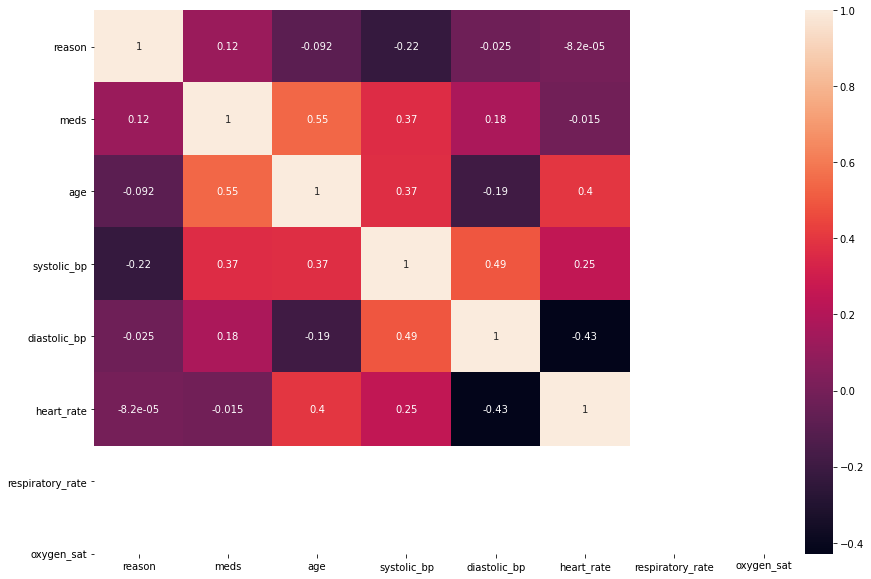

In [732]:
fig=plt.figure(figsize=(15,10))
heat_map=Patient[['reason','meds','age','systolic_bp','diastolic_bp','heart_rate','respiratory_rate','oxygen_sat',]].corr(method='pearson')
cols=['reason','meds','age','systolic_bp','diastolic_bp','heart_rate','respiratory_rate','oxygen_sat']
axis=sns.heatmap(heat_map, annot=True, xticklabels=cols, yticklabels=cols )

##### Getting Distributions:

In [733]:
Patient.describe()

,age,systolic_bp,diastolic_bp,heart_rate,respiratory_rate,oxygen_sat
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,59.285714,126.666667,76.571429,97.761905,26.476190,92.380952
std,16.081489,19.885506,12.812382,26.929361,9.276956,10.897138
min,33.000000,87.000000,53.000000,41.000000,18.000000,47.000000
25%,47.000000,115.000000,68.000000,86.000000,20.000000,94.000000
50%,62.000000,125.000000,78.000000,102.000000,24.000000,95.000000
75%,74.000000,137.000000,82.000000,109.000000,28.000000,96.000000
max,81.000000,175.000000,101.000000,161.000000,55.000000,100.000000


<AxesSubplot:xlabel='heart_rate'>

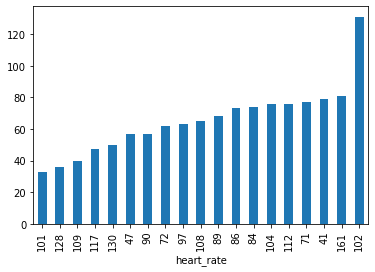

In [734]:
Patient.groupby('heart_rate')['age'].sum().sort_values().plot(kind='bar')

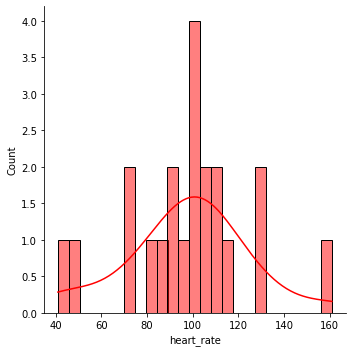

In [735]:
sns.displot(Patient.heart_rate,color='red', bins=25,kde=True)

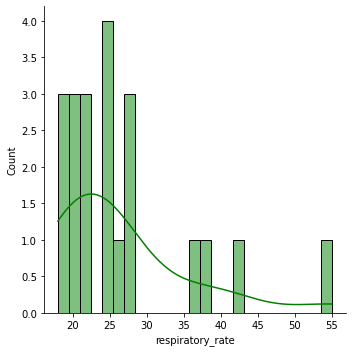

In [736]:
sns.displot(Patient.respiratory_rate ,color='green', bins=25,kde=True)

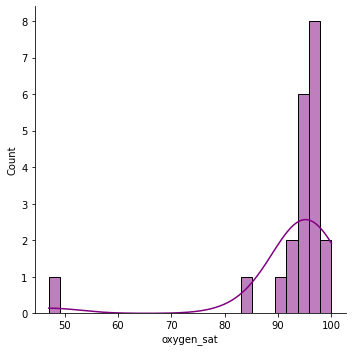

In [737]:
sns.displot(Patient['oxygen_sat'],color='purple', bins=25,kde=True)

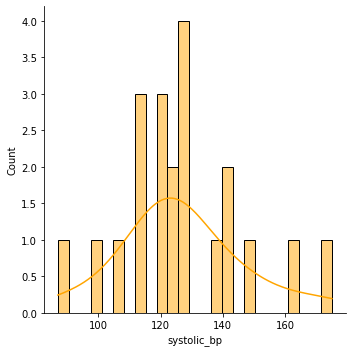

In [738]:
sns.displot(Patient['systolic_bp'],color='orange', bins=25,kde=True)

##### Forming a scattplot showcasing Age/Oxygen_Saturation in High_Chance_of_Afib vs Low_Chance_of_Afib.

In [739]:
High_Chance_of_Afib = Patient.query("heart_rate >= 60")
Low_Chance_of_Afib = Patient.query("heart_rate <= 60")

<AxesSubplot:xlabel='age', ylabel='oxygen_sat'>

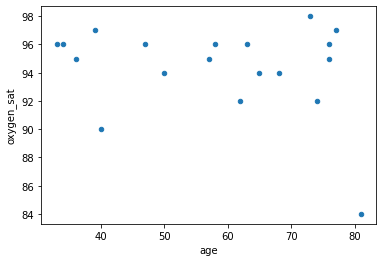

In [740]:
High_Chance_of_Afib.plot.scatter(x="age",y="oxygen_sat")

<AxesSubplot:xlabel='age', ylabel='oxygen_sat'>

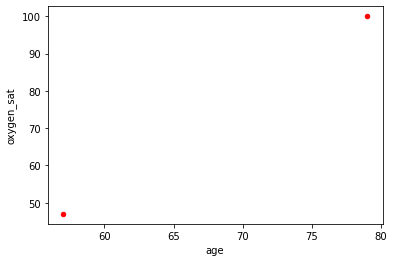

In [741]:
Low_Chance_of_Afib.plot.scatter(x="age",y="oxygen_sat", color = 'red')

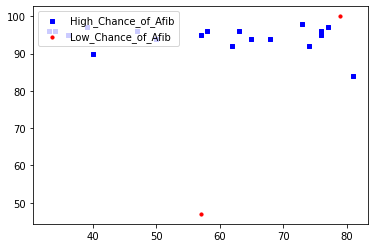

In [742]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)

ax1.scatter(High_Chance_of_Afib['age'], High_Chance_of_Afib['oxygen_sat'],s=10, c='b', marker="s", label='High_Chance_of_Afib')
ax1.scatter(Low_Chance_of_Afib['age'],Low_Chance_of_Afib['oxygen_sat'], s=10, c='r', marker="o", label='Low_Chance_of_Afib')
plt.legend(loc='upper left');
plt.show()

##### Scattplot of systolic_blood_pressure vs Heart_rate

<AxesSubplot:xlabel='systolic_bp', ylabel='heart_rate'>

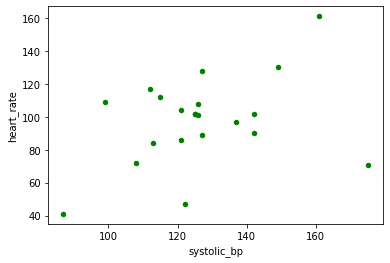

In [743]:
Patient.plot.scatter(x="systolic_bp",y="heart_rate", color="green")

##### Heart_Rate Boxplot

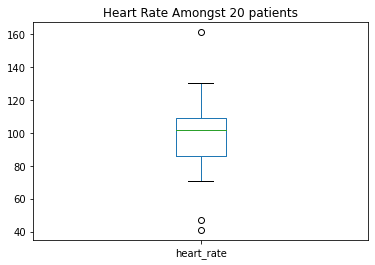

In [744]:
bxt = Patient.boxplot(column = 'heart_rate')
bxt.set_title('Heart Rate Amongst 20 patients')
bxt.grid(False)

##### Admission and comorbidities Bargraphs

In [745]:
Admission = Patient['reason'].groupby(Patient['reason']).count()
Admission

reason
COVID-19                           11
Cough                               1
Fever                               1
Pneumonia                           6
Pneumonia due to COVID-19 virus     1
Shortness of breath                 1
Name: reason, dtype: int64

<AxesSubplot:ylabel='Reason for Admission'>

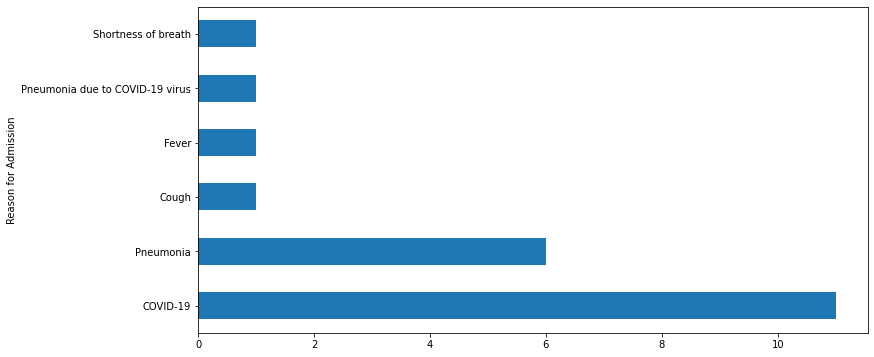

In [746]:
Admission.sort_values(ascending=False).plot(kind="barh",ylabel="Amount of Admissions",xlabel='Reason for Admission',figsize=(12,6))

In [747]:
Known_Illness = Patient['comorb'].groupby(Patient['comorb']).count()
Known_Illness

comorb
Asthma, Other                                                                                                        2
Chronic cardiac disease (not hypertension), Hypertension, Asthma, Obesity, Diabetes, Dementia any etiology, Other    1
Chronic cardiac disease (not hypertension), Hypertension, Diabetes, Other                                            1
Chronic cardiac disease (not hypertension), Hypertension, Other                                                      1
Hypertension, Chronic pulmonary (lung) disease, Asthma, Diabetes, Other                                              1
Hypertension, Chronic pulmonary (lung) disease, Other                                                                1
Hypertension, Chronic renal, Diabetes, Other                                                                         1
Hypertension, Diabetes, Other                                                                                        3
Hypertension, Kidney disease, Other      

##### Known Illness besides Admission reason Pie Chart 

(<AxesSubplot:>, <matplotlib.legend.Legend at 0x28d93c175e0>)

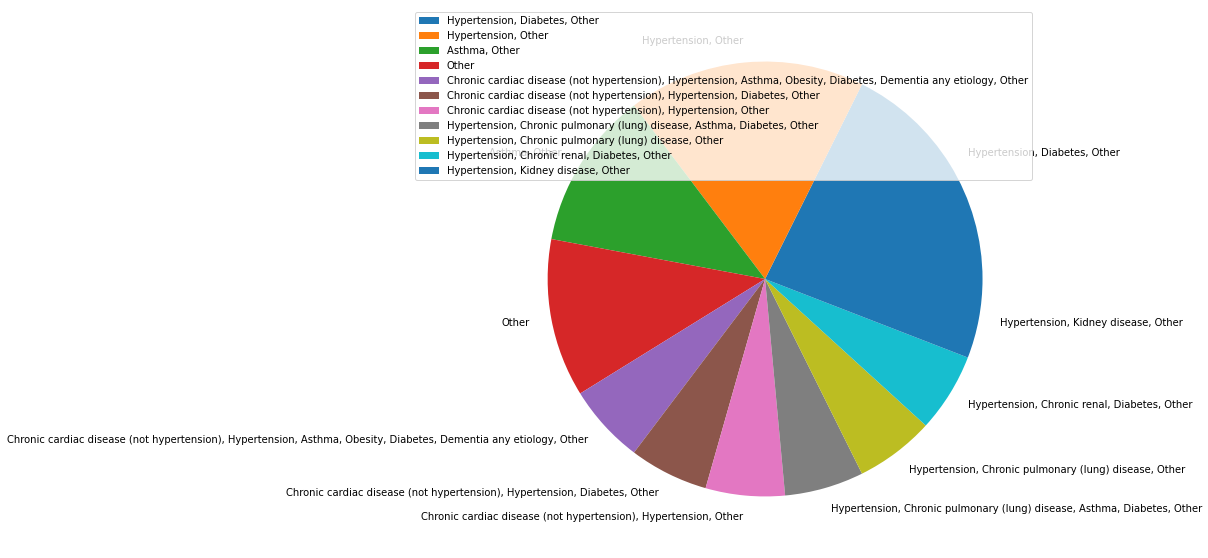

In [748]:
Known_Illness.sort_values(ascending=False).plot(kind="pie",ylabel="",xlabel='Illness',figsize=(20,10)),plt.legend(loc='best')

##### Pair Plot

In [749]:
Patient

,reason,age,sex,comorb,meds,er_2_weeks,admission_disposition,systolic_bp,diastolic_bp,heart_rate,respiratory_rate,oxygen_sat
504,COVID-19,81,Male,"Hypertension, Chronic renal, Diabetes, Other","medications:SYNTHROID,dosage:75 mcg,frequency:...",Yes,WARD,161,81,161,55,84
444,Pneumonia,79,Male,"Chronic cardiac disease (not hypertension), Hy...","medications:ELIQUIS,dosage:5,frequency:BID,med...",No,WARD,87,66,41,18,100
305,Pneumonia,47,Male,"Hypertension, Diabetes, Other","medications:NORVASC,dosage:10,frequency:OD,med...",No,WARD,112,81,117,20,96
112,COVID-19,74,Female,"Asthma, Other","medications:PANTOPRAZOLE,dosage:40,frequency:O...",No,WARD,113,71,84,20,92
53,Pneumonia,34,Male,None,None,No,WARD,125,70,102,18,96
6,COVID-19,50,Male,None,None,No,WARD,149,100,130,20,94
110,COVID-19,68,Male,"Hypertension, Other","medications:PENNSAID,dosage:4 drops,frequency:...",No,WARD,127,90,89,26,94
201,COVID-19,65,Male,"Hypertension, Diabetes, Other","medications:ROSUVASTATIN,dosage:20,frequency:OD",No,WARD,126,80,108,24,94
93,Pneumonia,76,Male,"Hypertension, Other","medications:TYLENOL EXTRA STRENGTH,dosage:500,...",No,WARD,115,57,112,28,96
84,COVID-19,62,Male,"Chronic cardiac disease (not hypertension), Hy...","medications:ACETYLSALICYLIC ACID TAB,dosage:8...",No,WARD,108,66,72,22,92


Had some strange errors here. I traced the problem back to some of the values of the hues only being present in one row of the Patient dataframe.

In [750]:
Patient.reason.groupby(Patient.reason).count()

reason
COVID-19                           11
Cough                               1
Fever                               1
Pneumonia                           6
Pneumonia due to COVID-19 virus     1
Shortness of breath                 1
Name: reason, dtype: int64

C:\Users\natal\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\natal\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\natal\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\natal\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\natal\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\natal\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

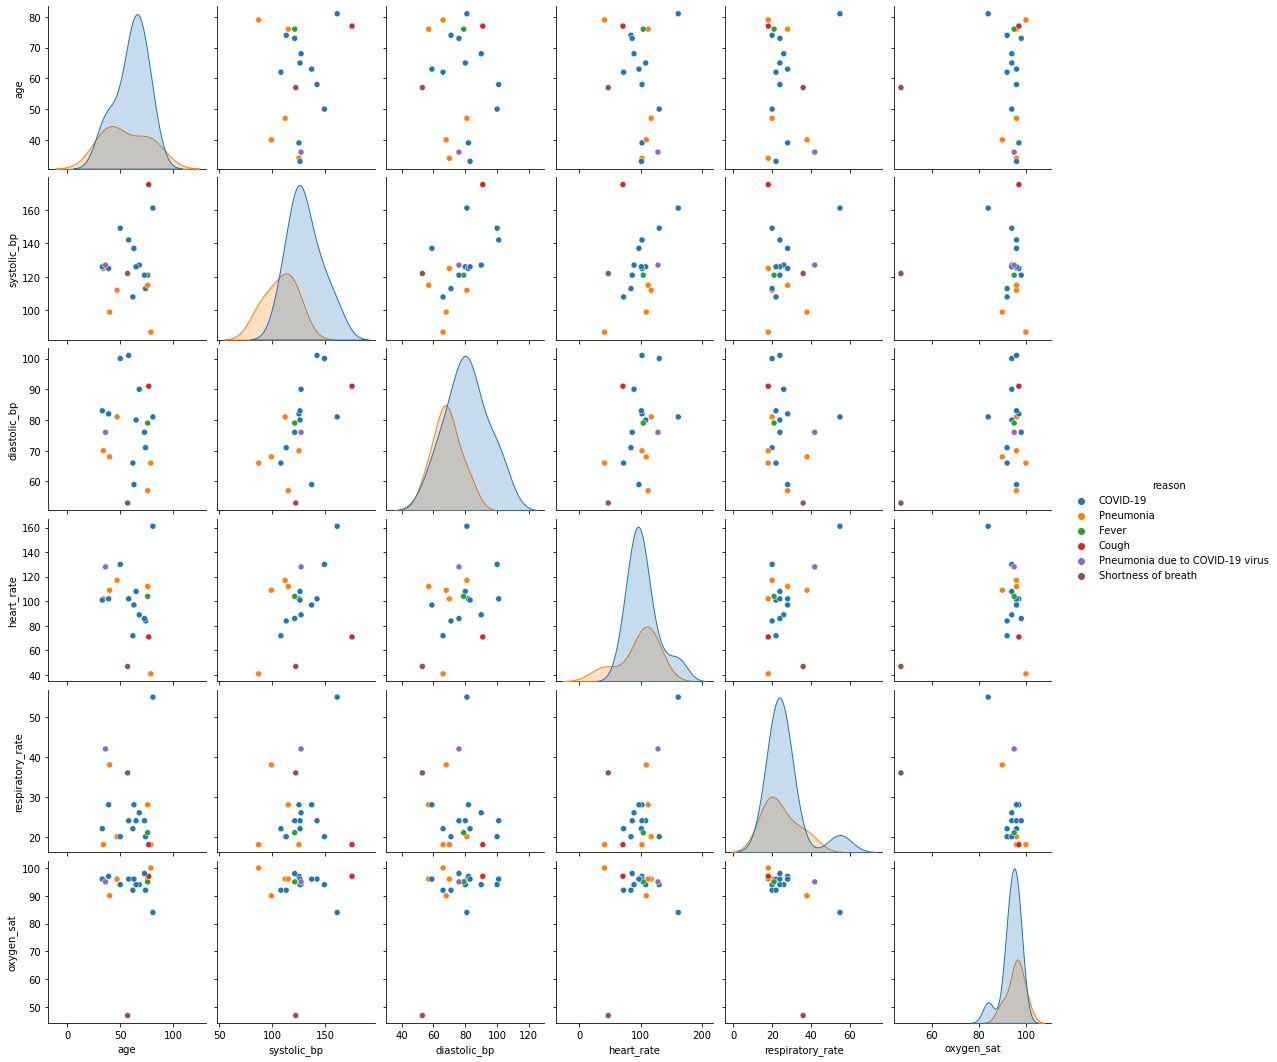

In [751]:
pair_plot=sns.pairplot(Patient[0:20], hue="reason")

In [752]:
Patient.comorb.groupby(Patient.comorb).count()

comorb
Asthma, Other                                                                                                        2
Chronic cardiac disease (not hypertension), Hypertension, Asthma, Obesity, Diabetes, Dementia any etiology, Other    1
Chronic cardiac disease (not hypertension), Hypertension, Diabetes, Other                                            1
Chronic cardiac disease (not hypertension), Hypertension, Other                                                      1
Hypertension, Chronic pulmonary (lung) disease, Asthma, Diabetes, Other                                              1
Hypertension, Chronic pulmonary (lung) disease, Other                                                                1
Hypertension, Chronic renal, Diabetes, Other                                                                         1
Hypertension, Diabetes, Other                                                                                        3
Hypertension, Kidney disease, Other      

C:\Users\natal\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\natal\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\natal\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\natal\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\natal\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\natal\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

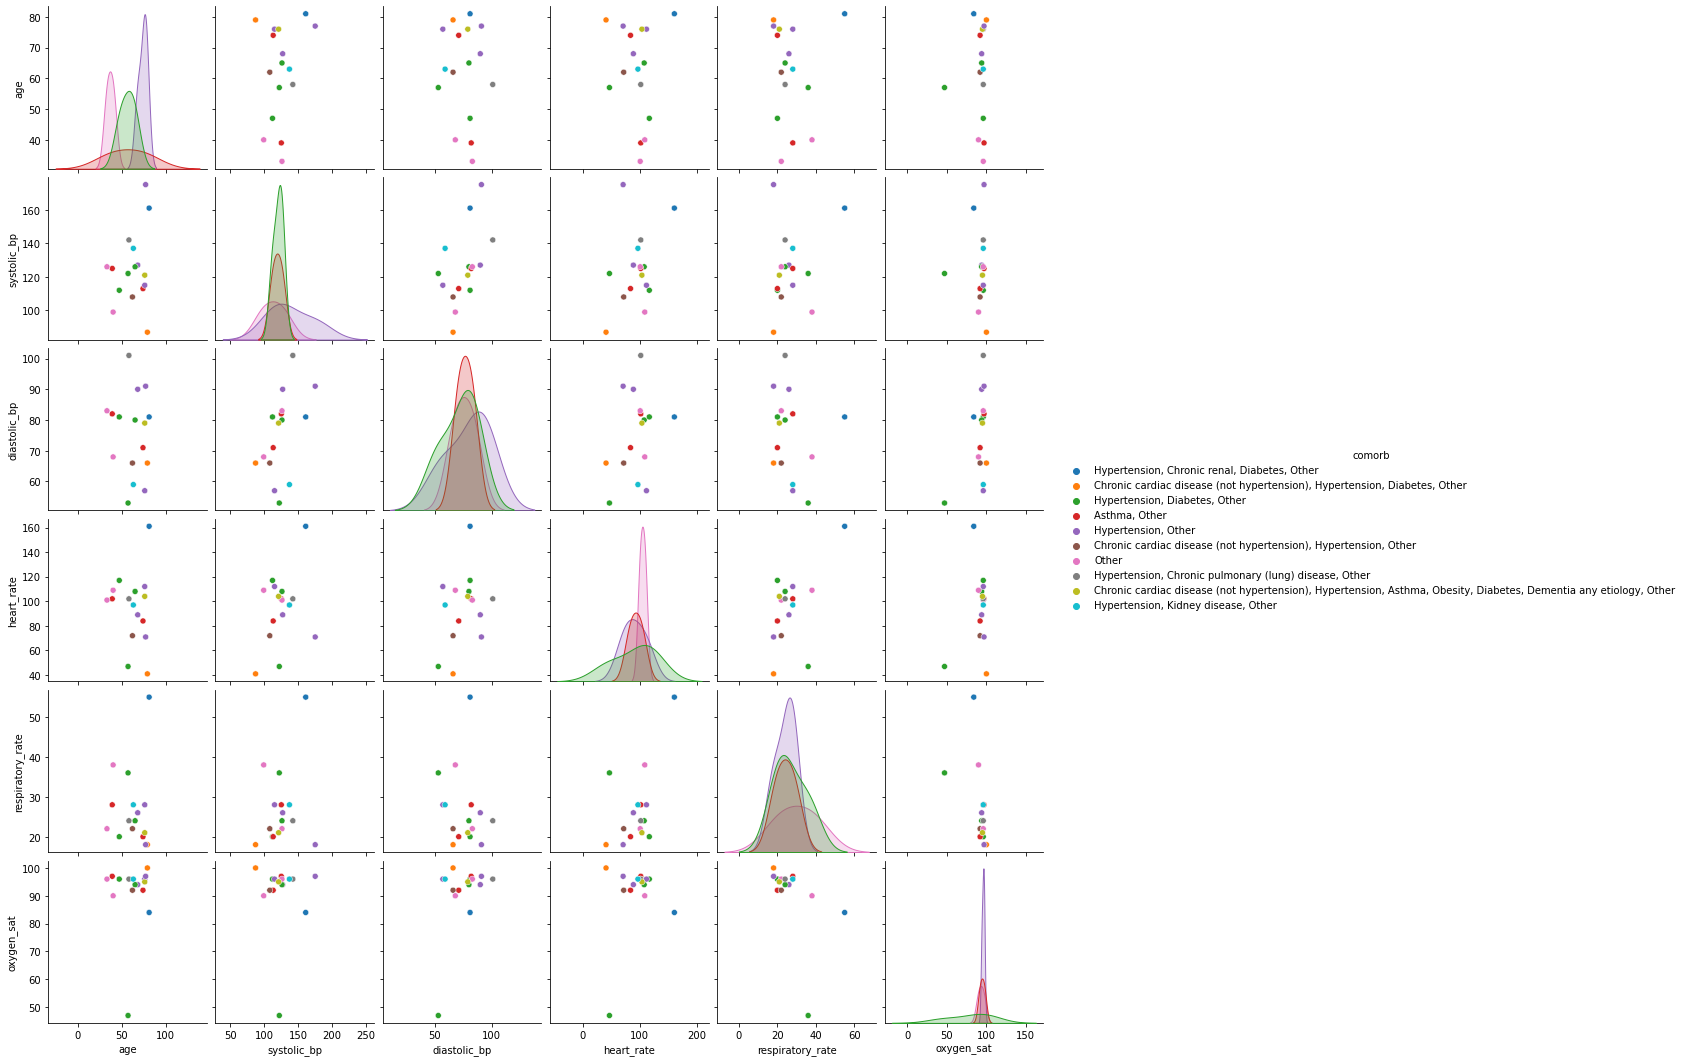

In [753]:
pair_plot=sns.pairplot(Patient[0:20], hue="comorb")